<h1>Classwork 4 : MovieLens 100K Dataset</h1>

<h3> Download datasets from https://grouplens.org/datasets/movielens/100k/. Use Pandas to analyze data and answer the following questions.
(Show results only 10 records ( Use .head(10) ))</h3>

<h3>1. Show data from Users/Ratings/Movies</h3>
Users (u.user), Movies (u.item), Ratings (u.data)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2>Users Table</h2>
Read data from ml-100k/u.user

In [8]:
column_Users = ['userId','age','gender','occupation','zipcode']
#Read data from files and put them in Users
Users = pd.read_table('ml-100k/ml-100k/u.user', sep='|', names=column_Users)
#Show only the first 10 rows
#Users =
#-----------------------
Users.head(10)

,userId,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


<h2>Movies Table</h2>
Read from ml-100k/u.item

In [12]:
column_Movies = ['movieId','movieTitle','releaseDate', 'videoReleaseDate', 'IMDbURL','unknown', 'Action',
                 'Adventure','Animation','Childrens','Comedy','Crime','Documentary', 'Drama', 'Fantasy',
                 'Film-Noir','Horror','Musical', 'Mystery', 'Romance','Sci-Fi','Thriller','War','Western']

#May need encoding option when opening the csv file where encoding = "ISO-8859-1"
# May need to define engine='python'

#Read data from files and put them in Movies
Movies = pd.read_table('ml-100k/ml-100k/u.item', sep='|', engine='python', encoding='ISO-8859-1', names=column_Movies)
#Show only the first 10 rows
#Movies =
#------------------------------------------------
Movies.head()

,movieId,movieTitle,releaseDate,videoReleaseDate,IMDbURL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<h2>Ratings Table</h2>
Read data from ml-100k/u.data

In [14]:
column_Ratings = [ 'userId', 'movieId', 'rating', 'timestamp']
#Read data from files and put them in Ratings
Ratings = pd.read_table('ml-100k/ml-100k/u.data', names=column_Ratings)
#Show only the first 10 rows
#Ratings =
#------------------------------------------------
Ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


<h3>1.1 Is data in Users/Movis/Rating dirty? If yes, how to clean them?. Show the methods. </h3>
<p>**Hint**: some columns in Movies are not clean </p>

In [15]:
#Check data in Users
#is any row NULL ?
#-----------------------
Users.isna().sum()

userId        0
age           0
gender        0
occupation    0
zipcode       0
dtype: int64

In [17]:
#Check data in Movies
#is any row NULL ?
#-----------------------
Movies.isna().sum(), Movies.shape

(movieId                0
 movieTitle             0
 releaseDate            1
 videoReleaseDate    1682
 IMDbURL                3
 unknown                0
 Action                 0
 Adventure              0
 Animation              0
 Childrens              0
 Comedy                 0
 Crime                  0
 Documentary            0
 Drama                  0
 Fantasy                0
 Film-Noir              0
 Horror                 0
 Musical                0
 Mystery                0
 Romance                0
 Sci-Fi                 0
 Thriller               0
 War                    0
 Western                0
 dtype: int64,
 (1682, 24))

In [18]:
#Check data in Ratings
#is any row NULL ?
#-----------------------
Ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

<h3>Fix dirty data </h3>

In [23]:
#Fix dirty data
#---------------------
# Show the first 10 records after cleansing
# Movies.drop(columns=['videoReleaseDate'], inplace=True)
Movies.dropna(inplace=True)
Movies.shape

(1679, 23)

In [24]:
#Recheck data in Movies table
#----------------------------------
Movies.isna().sum()

movieId        0
movieTitle     0
releaseDate    0
IMDbURL        0
unknown        0
Action         0
Adventure      0
Animation      0
Childrens      0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64

In [ ]:
#From the previous cell, if some columns are still Null, show how many records in each column are still null?
#------------------------------------


In [33]:
#Show a number of rows in Movies dataFrame
#-------------------------------------------
Movies.shape[0]

1679

In [ ]:
#Handle rows that are null in the Movies datafram.  Justify your answer.
#----------------------------------------------------------


<h3>2. Show a number of movies for each genre. Use appropriate visualization method.</h3>

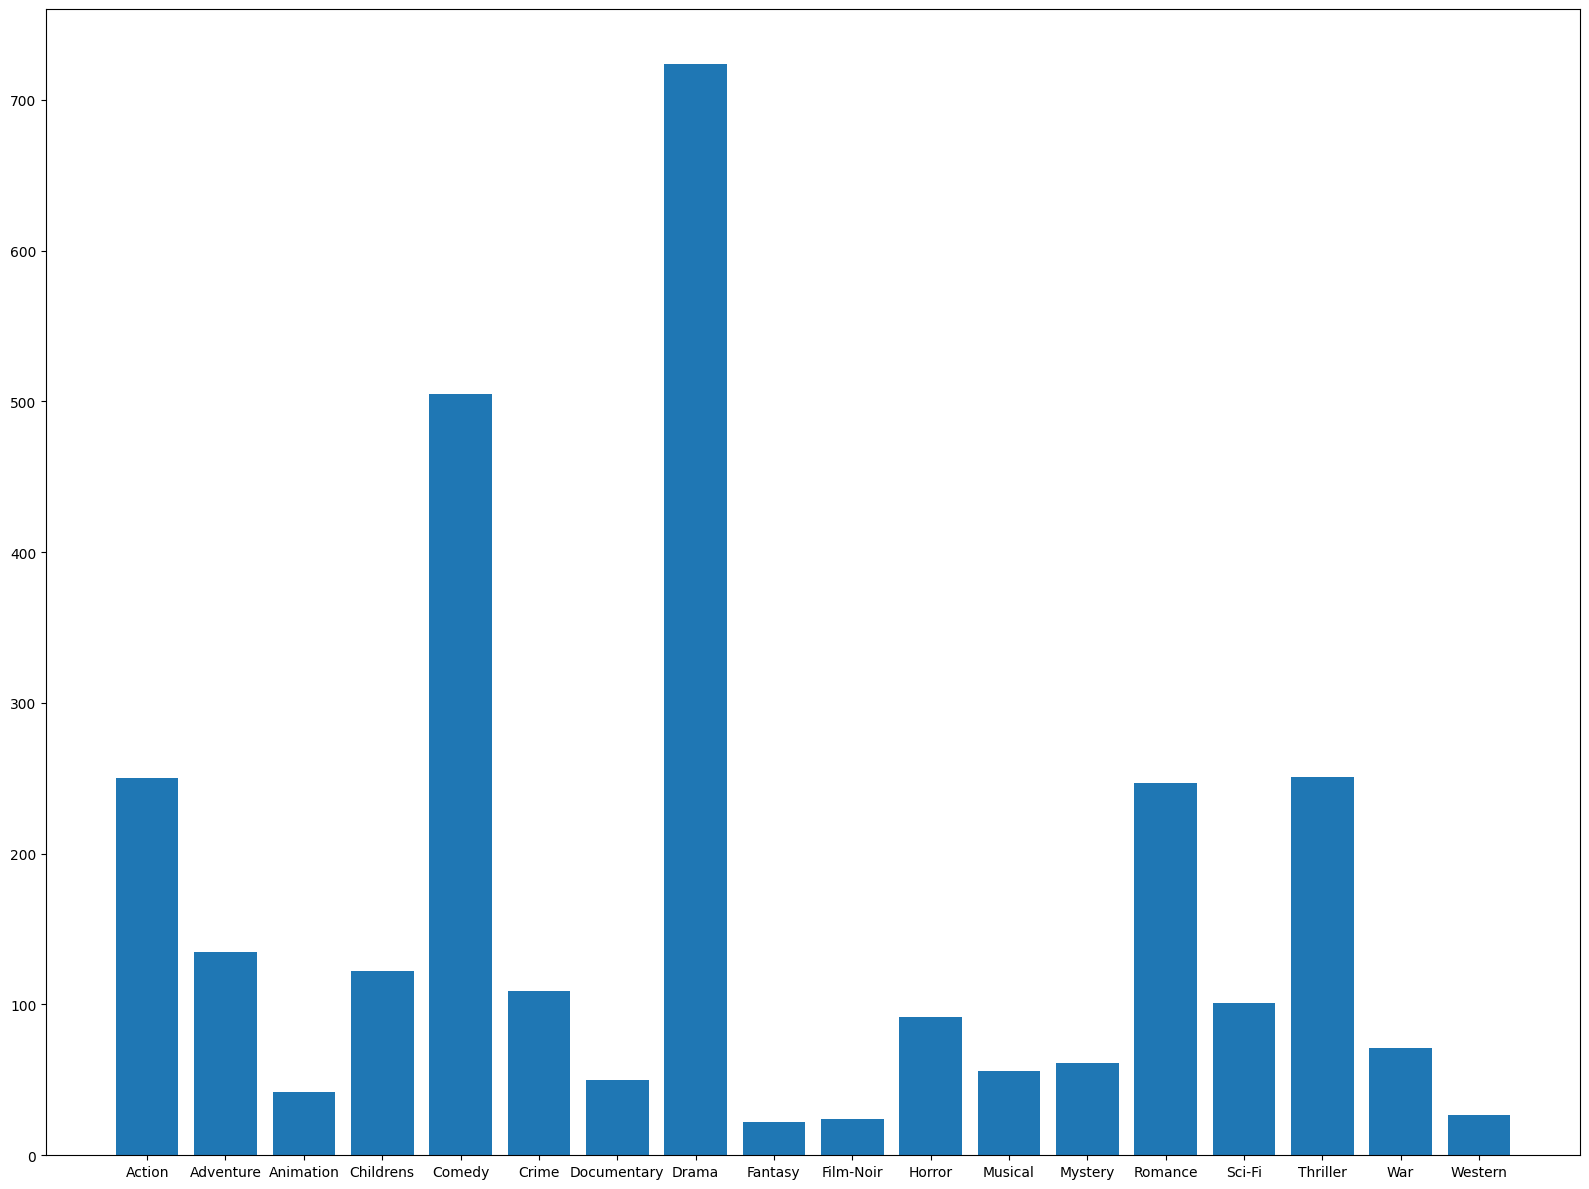

In [42]:
genre_list = ['Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary', 'Drama', 'Fantasy',
                    'Film-Noir','Horror','Musical', 'Mystery', 'Romance','Sci-Fi','Thriller','War','Western']
#Count a number of movies for each genre as shown in the genre_list
number_movies = Movies[genre_list].sum()

#Plot graph to show a number of movies for each genre
#--------------------------------------------------------
plt.figure(figsize=(16, 12))
plt.bar(genre_list, number_movies)
plt.tight_layout()

<h3>3. Find users who are less than 25 years old and are female</h3>

In [45]:
#Find users who are less than 25 years old and are female
#--------------------------------------------------------
mask = (Users.age < 25) & (Users.gender == 'F')

Users[mask]

,userId,age,gender,occupation,zipcode
23,24,21,F,artist,94533
34,35,20,F,homemaker,42459
35,36,19,F,student,93117
48,49,23,F,student,76111
51,52,18,F,student,55105
...,...,...,...,...,...
886,887,14,F,student,27249
903,904,17,F,student,61073
916,917,22,F,student,20006
920,921,20,F,student,98801


<h3>4. Find the average rating for each user</h3>

In [47]:
Ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [61]:
#=-----------------------------
Ratings[['rating', 'userId']].groupby('userId').mean().sort_values(by='rating', ascending=False)

,rating
userId,
849,4.869565
688,4.833333
507,4.724138
628,4.703704
928,4.687500
...,...
774,2.058036
685,2.050000
445,1.985185


<h3>5. Show the average age of male programmer</h3>

In [67]:
#----------------------------------
mask = (Users['occupation'] == 'programmer') & (Users['gender'] == 'M')
Users[mask].age.mean()

33.21666666666667

<h3>6. Show 5 Movies titles released in 1996 or later which achieve highest rating score.</h3>

In [86]:
Movies.releaseDate = pd.to_datetime(Movies.releaseDate)

In [94]:
#----------------------------------------
movies_score = pd.merge(Movies, Ratings)
mask = movies_score.releaseDate >= '01-Jan-1996'

movies_score[mask].groupby('movieTitle').rating.mean().reset_index().sort_values(by='rating', ascending=False).head()

,movieTitle,rating
525,Santa with Muscles (1996),5.0
560,Someone Else's America (1995),5.0
573,Star Kid (1997),5.0
11,Aiqing wansui (1994),5.0
492,Prefontaine (1997),5.0


<h3>7. Find Pearson's correlation coefficient between age and rating. Justify your answer.</h3>

In [121]:
#-------------------------------
age_rating = pd.merge(Users, Ratings)
age_rating[['age', 'rating']].corr('pearson')

,age,rating
age,1.00000,0.05446
rating,0.05446,1.00000


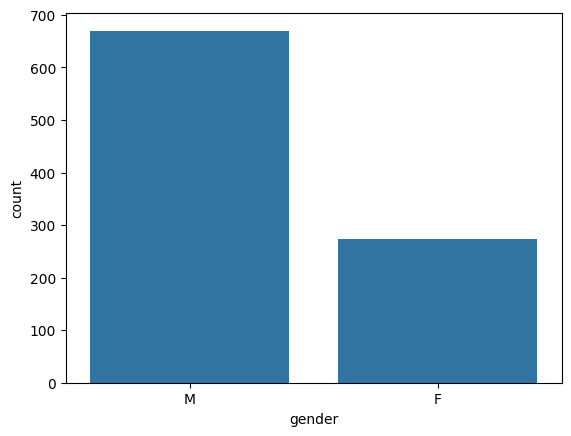

In [132]:
import seaborn as sns
counts = Users.gender.value_counts()

# plt.bar(counts.keys(), counts)
sns.barplot(counts)
plt.show()